In [10]:
!pip install tensorflow keras opencv-python tqdm

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import os
import re
from tqdm import tqdm
from keras import layers, models
from keras.datasets import mnist
from keras.preprocessing.image import img_to_array
from sklearn.model_selection import train_test_split
import tensorflow as tf
import keras

In [12]:
(X_train_full,_),(X_test_full,_)= mnist.load_data()

X_train_full=X_train_full.astype('float32')/255.0
X_test_full=X_test_full.astype('float32')/255.0
X_train_full=np.reshape(X_train_full,(len(X_train_full), 28, 28, 1))
X_test_full=np.reshape(X_test_full,(len(X_test_full), 28, 28, 1))

X_train, X_val = train_test_split(X_train_full, test_size=0.2, random_state=4)

In [13]:
#Function to create the convolutional autoencoder
def create_autoencoder(input_shape):
    encoder_input = layers.Input(shape=input_shape)
    
    x = layers.Conv2D(32,(3,3),activation='relu',padding='same')(encoder_input)
    x = layers.MaxPooling2D((2,2),padding='same')(x)
    x = layers.Conv2D(16,(3,3),activation='relu',padding='same')(x)
    latent_space = layers.MaxPooling2D((2,2),padding='same')(x)

    x = layers.Conv2DTranspose(16,(3,3),activation='relu',padding='same')(latent_space)
    x = layers.UpSampling2D((2,2))(x)
    x = layers.Conv2DTranspose(32, (3,3),activation='relu',padding='same')(x)
    x = layers.UpSampling2D((2,2))(x)
    decoder_output = layers.Conv2DTranspose(1,(3,3),activation='sigmoid',padding='same')(x)

    autoencoder = models.Model(encoder_input,decoder_output)
    return autoencoder


In [14]:
input_shape = (28,28,1)
autoencoder = create_autoencoder(input_shape)
autoencoder.compile(optimizer='adam',loss='binary_crossentropy')

In [15]:
history = autoencoder.fit(X_train,X_train,epochs=10,batch_size=256,validation_data=(X_val, X_val))

Epoch 1/10


I0000 00:00:1740103551.890265     105 service.cc:145] XLA service 0x7e76f4004c40 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1740103551.890314     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1740103551.890318     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


 25/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.6326

I0000 00:00:1740103554.796381     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


188/188 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - loss: 0.3520 - val_loss: 0.0944
Epoch 2/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0899 - val_loss: 0.0825
Epoch 3/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0812 - val_loss: 0.0783
Epoch 4/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0777 - val_loss: 0.0761
Epoch 5/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0757 - val_loss: 0.0745
Epoch 6/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0743 - val_loss: 0.0739
Epoch 7/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0734 - val_loss: 0.0729
Epoch 8/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0727 - val_loss: 0.0726
Epoch 9/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0720 - val_loss: 0.0718
Epoch 10/10
188/188 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0715 - val_loss: 0.0713


In [16]:
train_loss = history.history['loss'][-1]
val_loss = history.history['val_loss'][-1]

print(f"Final Training Loss: {train_loss:.4f}")
print(f"Final Validation Loss: {val_loss:.4f}")

Final Training Loss: 0.0715
Final Validation Loss: 0.0713


In [17]:
decoded_test_images=autoencoder.predict(X_test_full)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


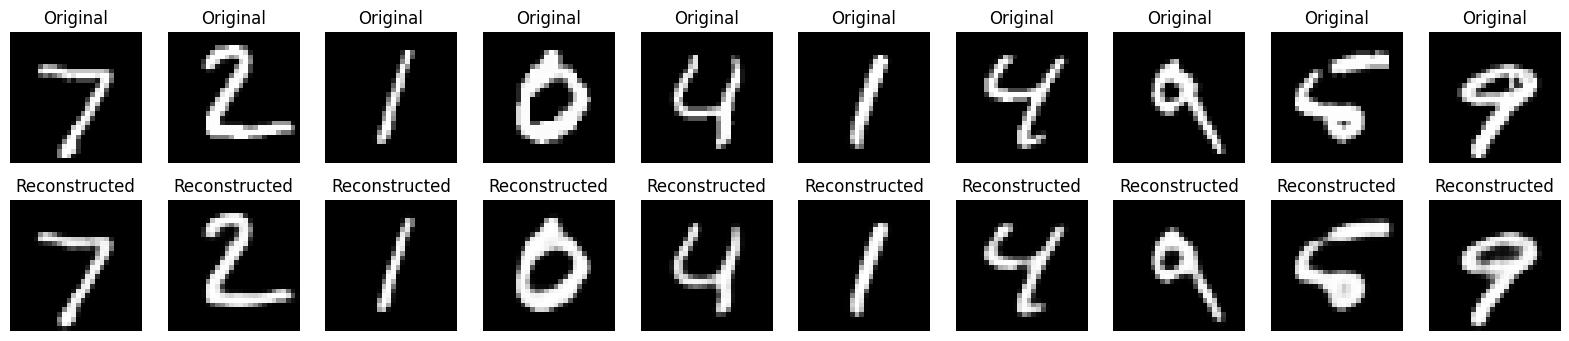

In [18]:
n = 10 
plt.figure(figsize=(20,4))
for i in range(n):
    ax = plt.subplot(2,n,i+1)
    plt.imshow(X_test_full[i].reshape(28,28),cmap='gray')
    plt.title("Original")
    plt.axis('off')

    ax = plt.subplot(2,n,i+1+n)
    plt.imshow(decoded_test_images[i].reshape(28,28),cmap='gray')
    plt.title("Reconstructed")
    plt.axis('off')

plt.show()

okay now you have seen how an autoencoder works, now lets see GANs

In [19]:
# to get the files in proper order
def sorted_alphanumeric(data):  
    convert = lambda text:int(text) if text.isdigit() else text.lower()
    alphanum_key = lambda key:[convert(c) for c in re.split('([0-9]+)',key)]
    return sorted(data,key=alphanum_key)
# defining the size of the image
SIZE =  256
color_img = []
path = '../input/landscape-image-colorization/landscape Images/color'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):    
        if i=='4200.jpg':
            break
        else:    
            img = cv2.imread(path +'/'+i,1)
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img = cv2.resize(img, (SIZE, SIZE))
            img = img.astype('float32')/255.0
            color_img.append(img_to_array(img))


gray_img = []
path = '../input/landscape-image-colorization/landscape Images/gray'
files = os.listdir(path)
files = sorted_alphanumeric(files)
for i in tqdm(files):
         if i == '4200.jpg':
            break
         else: 
            img = cv2.imread(path +'/'+i,1)
            img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
            img = cv2.resize(img,(SIZE, SIZE))
            img = img.astype('float32')/255.0
            gray_img.append(img_to_array(img))

 59%|█████▉    | 4200/7129 [00:42<00:29, 98.60it/s] 


In [20]:
batch_size=16
color_dataset=tf.data.Dataset.from_tensor_slices(np.array(color_img[:4000])).batch(batch_size)
gray_dataset=tf.data.Dataset.from_tensor_slices(np.array(gray_img[:4000])).batch(batch_size)
color_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(color_img[4000:])).batch(batch_size)
gray_dataset_t=tf.data.Dataset.from_tensor_slices(np.array(gray_img[4000:])).batch(batch_size)
Color_test = color_img[4000:]
Gray_test = gray_img[4000:]
print("Number of batches:",color_dataset.cardinality().numpy())
for batch in color_dataset.take(1):
    print("Shape of one batch:",batch.shape)

Number of batches: 250
Shape of one batch: (16, 256, 256, 3)


In [21]:
example_color = next(iter(color_dataset))
example_gray = next(iter(gray_dataset))

In [22]:
def plot_images(a = 4):
    for i in range(a):
        plt.figure(figsize = (10,10))
        plt.subplot(121)
        plt.title('color')
        plt.imshow(example_color[i] )
        plt.subplot(122)
        plt.title('gray')
        plt.imshow(example_gray[i])
        plt.show()

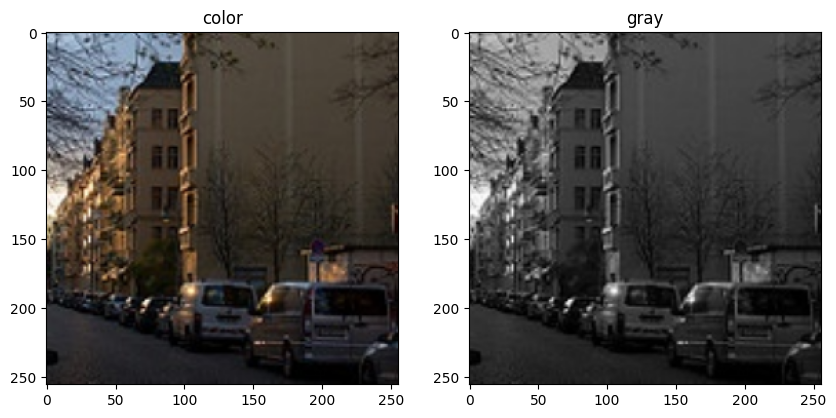

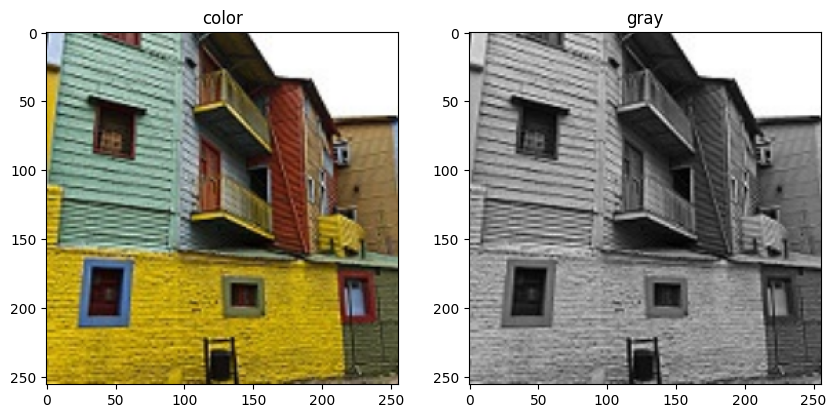

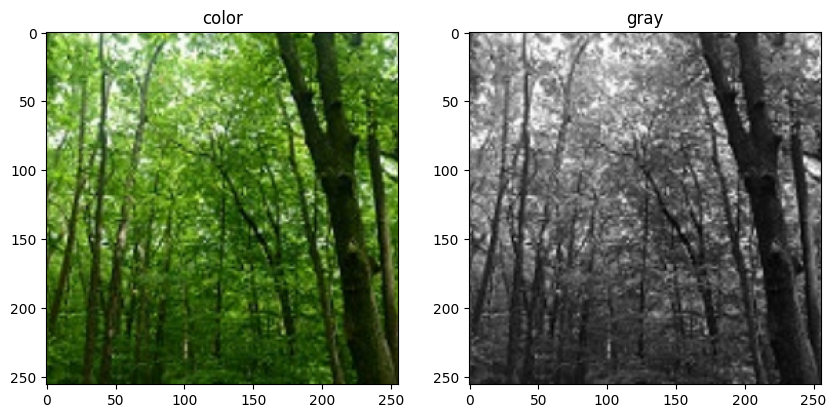

In [23]:
plot_images(3)

In [25]:
def downsample(filters, size, apply_batchnorm=True):
  result = tf.keras.Sequential()
  result.add(
      tf.keras.layers.Conv2D(filters, size, strides=2, padding='same',
                             kernel_initializer='he_normal', use_bias=False))
  if apply_batchnorm:
    result.add(tf.keras.layers.BatchNormalization())
  result.add(tf.keras.layers.LeakyReLU())
  return result

def upsample(filters, size, apply_dropout=False):
  result = tf.keras.Sequential()
  result.add(
    tf.keras.layers.Conv2DTranspose(filters, size, strides=2,
                                    padding='same',
                                    kernel_initializer='he_normal',
                                    use_bias=False))
  result.add(tf.keras.layers.BatchNormalization())
  if apply_dropout:
      result.add(tf.keras.layers.Dropout(0.5))
  result.add(tf.keras.layers.ReLU())
  return result  

In [26]:
def Generator():
  inputs = tf.keras.layers.Input(shape=[256,256,3])
  down_stack = [
    downsample(64, 4, apply_batchnorm=False),
    downsample(128, 4),
    downsample(256, 4),
    downsample(512, 4),
    downsample(512, 4),
    downsample(512, 4),
    downsample(512, 4),
    downsample(512, 4),
  ]
  up_stack = [
    upsample(512, 4, apply_dropout=True),
    upsample(512, 4, apply_dropout=True),
    upsample(512, 4, apply_dropout=True),
    upsample(512, 4),
    upsample(256, 4),
    upsample(128, 4),
    upsample(64, 4), 
  ]

  initializer = tf.random_normal_initializer(0., 0.02)
  last = tf.keras.layers.Conv2DTranspose(3, 4,
                                         strides=2,
                                         padding='same',
                                         kernel_initializer=initializer,
                                         activation='tanh') 
  x = inputs

  skips = []
  for down in down_stack:
    x = down(x)
    skips.append(x)
  skips = reversed(skips[:-1])
  for up, skip in zip(up_stack, skips):
    x = up(x)
    x = tf.keras.layers.Concatenate()([x, skip])
  x = last(x)
  return tf.keras.Model(inputs=inputs, outputs=x)

In [27]:
def Discriminator():
  initializer = tf.random_normal_initializer(0.,0.02)
  inp = tf.keras.layers.Input(shape=[SIZE,SIZE,3],name='input_image')
  tar = tf.keras.layers.Input(shape=[SIZE,SIZE,3],name='target_image')
  x = tf.keras.layers.concatenate([inp,tar])

  down1 = downsample(64,4, False)(x)
  down2 = downsample(128,4)(down1)
  down3 = downsample(256,4)(down2)

  zero_pad1 = tf.keras.layers.ZeroPadding2D()(down3) 
  conv = tf.keras.layers.Conv2D(512, 4, strides=1,
                                kernel_initializer=initializer,
                                use_bias=False)(zero_pad1)

  batchnorm1 = tf.keras.layers.BatchNormalization()(conv)
  leaky_relu = tf.keras.layers.LeakyReLU()(batchnorm1)
  zero_pad2 = tf.keras.layers.ZeroPadding2D()(leaky_relu)
  last = tf.keras.layers.Conv2D(1, 4, strides=1,
                                kernel_initializer=initializer)(zero_pad2)
  return tf.keras.Model(inputs=[inp, tar], outputs=last)

In [28]:
generator = Generator()
generator.summary()

Model: "functional_18"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_2       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential          │ (None, 128, 128,  │      3,072 │ input_layer_2[0]… │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 64, 64,    │    131,584 │ sequential[0][0]  │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_2        │ (None, 32, 32,    │    525,312 │ sequential_1[0][… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_3        │ (None, 16, 16,    │  2,099,200 │ sequential_2[0][… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_4        │ (None, 8, 8, 512) │  4,196,352 │ sequential_3[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_5        │ (None, 4, 4, 512) │  4,196,352 │ sequential_4[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_6        │ (None, 2, 2, 512) │  4,196,352 │ sequential_5[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_7        │ (None, 1, 1, 512) │  4,196,352 │ sequential_6[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_8        │ (None, 2, 2, 512) │  4,196,352 │ sequential_7[0][… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate         │ (None, 2, 2,      │          0 │ sequential_8[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_6[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_9        │ (None, 4, 4, 512) │  8,390,656 │ concatenate[0][0] │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_1       │ (None, 4, 4,      │          0 │ sequential_9[0][… │
│ (Concatenate)       │ 1024)             │            │ sequential_5[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_10       │ (None, 8, 8, 512) │  8,390,656 │ concatenate_1[0]… │
│ (Sequential)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_2       │ (None, 8, 8,      │          0 │ sequential_10[0]… │
│ (Concatenate)       │ 1024)             │            │ sequential_4[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_11       │ (None, 16, 16,    │  8,390,656 │ concatenate_2[0]… │
│ (Sequential)        │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_3       │ (None, 16, 16,    │          0 │ sequential_11[0]

 Total params: 54,425,859 (207.62 MB)

 Trainable params: 54,414,979 (207.58 MB)

 Non-trainable params: 10,880 (42.50 KB)

In [29]:
discriminator = Discriminator()
discriminator.summary()

Model: "functional_23"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_image         │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ target_image        │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenate_7       │ (None, 256, 256,  │          0 │ input_image[0][0… │
│ (Concatenate)       │ 6)                │            │ target_image[0][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_15       │ (None, 128, 128,  │      6,144 │ concatenate_7[0]… │
│ (Sequential)        │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_16       │ (None, 64, 64,    │    131,584 │ sequential_15[0]… │
│ (Sequential)        │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_17       │ (None, 32, 32,    │    525,312 │ sequential_16[0]… │
│ (Sequential)        │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d      │ (None, 34, 34,    │          0 │ sequential_17[0]… │
│ (ZeroPadding2D)     │ 256)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 31, 31,    │  2,097,152 │ zero_padding2d[0… │
│                     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ batch_normalizatio… │ (None, 31, 31,    │      2,048 │ conv2d_15[0][0]   │
│ (BatchNormalizatio… │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ leaky_re_lu_11      │ (None, 31, 31,    │          0 │ batch_normalizat… │
│ (LeakyReLU)         │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ zero_padding2d_1    │ (None, 33, 33,    │          0 │ leaky_re_lu_11[0… │
│ (ZeroPadding2D)     │ 512)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 30, 30, 1) │      8,193 │ zero_padding2d_1… │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,770,433 (10.57 MB)

 Trainable params: 2,768,641 (10.56 MB)

 Non-trainable params: 1,792 (7.00 KB)

In [30]:
loss_object = tf.keras.losses.BinaryCrossentropy(from_logits=True)
generator_optimizer = tf.keras.optimizers.Adam(2e-4,beta_1=0.5)
discriminator_optimizer = tf.keras.optimizers.Adam(2e-4,beta_1=0.5)
LAMBDA = 100
def generator_loss(disc_generated_output, gen_output, target):
  gan_loss = loss_object(tf.ones_like(disc_generated_output), disc_generated_output)
  l1_loss = tf.reduce_mean(tf.abs(target - gen_output))
  total_gen_loss = gan_loss + (LAMBDA * l1_loss)
  return total_gen_loss, gan_loss, l1_loss
    
def discriminator_loss(disc_real_output, disc_generated_output):
  real_loss = loss_object(tf.ones_like(disc_real_output), disc_real_output)
  generated_loss = loss_object(tf.zeros_like(disc_generated_output), disc_generated_output)
  total_disc_loss = real_loss + generated_loss
  return total_disc_loss

In [31]:
def train_step(input_image, target, epoch):
  with tf.GradientTape() as gen_tape,tf.GradientTape() as disc_tape:
    gen_output = generator(input_image,training=True)
    disc_real_output = discriminator([input_image,target], training=True)
    disc_generated_output = discriminator([input_image,gen_output], training=True)
    gen_total_loss, gen_gan_loss, gen_l1_loss = generator_loss(disc_generated_output, gen_output, target)
    disc_loss = discriminator_loss(disc_real_output,disc_generated_output)

  generator_gradients = gen_tape.gradient(gen_total_loss,
                                          generator.trainable_variables)
  discriminator_gradients = disc_tape.gradient(disc_loss,
                                               discriminator.trainable_variables)
  generator_optimizer.apply_gradients(zip(generator_gradients,
                                          generator.trainable_variables))
  discriminator_optimizer.apply_gradients(zip(discriminator_gradients,
                                              discriminator.trainable_variables))

 

In [32]:
import time
def fit(train_ds, epochs,):
  for epoch in range(epochs):
    start = time.time()
    print("Epoch: ", epoch+1)
    for n, (input_image, target) in train_ds.enumerate():
      train_step(input_image, target, epoch)
    print()
    print ('Time taken for epoch {} is {} sec\n'.format(epoch + 1,
                                                        time.time()-start))


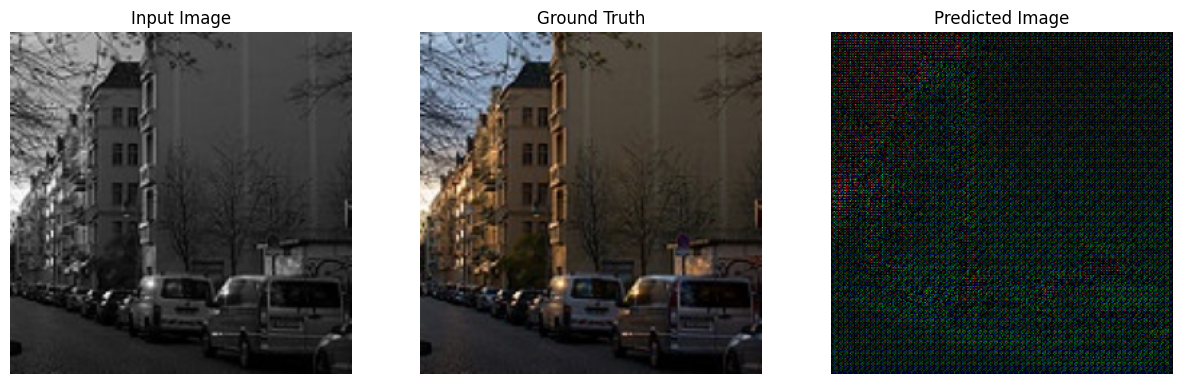

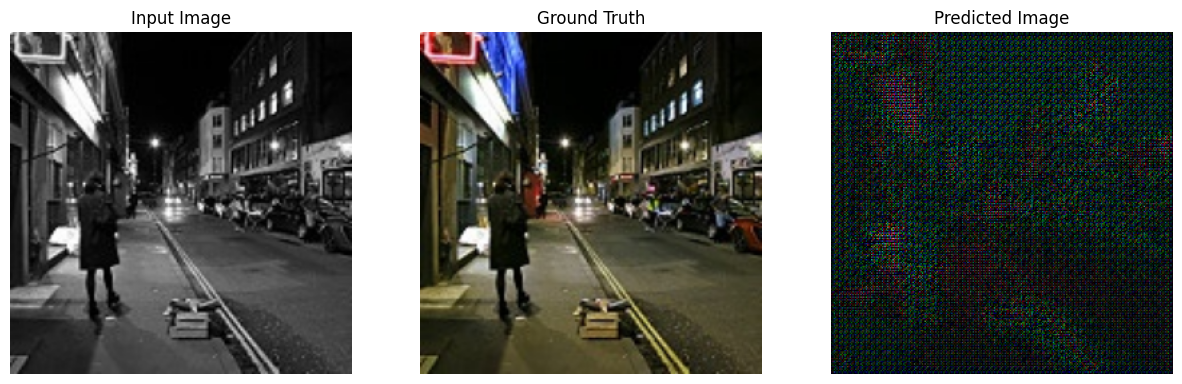

In [33]:
def generate_images(model, test_input, tar):
  prediction = model(test_input, training=True)
  plt.figure(figsize=(15,15))
  display_list = [test_input[0], tar[0], prediction[0]]
  title = ['Input Image', 'Ground Truth', 'Predicted Image']
  for i in range(3):
    plt.subplot(1, 3, i+1)
    plt.title(title[i])
    plt.imshow(display_list[i])
    plt.axis('off')
  plt.show()
for example_input, example_target in tf.data.Dataset.zip((gray_dataset,color_dataset)).take(2):
  generate_images(generator, example_input, example_target)

In [34]:
import tensorflow as tf
tf.keras.backend.clear_session()

In [35]:
fit(tf.data.Dataset.zip((gray_dataset, color_dataset)),epochs = 2)

Epoch:  1

Time taken for epoch 1 is 282.8824965953827 sec

Epoch:  2

Time taken for epoch 2 is 278.1454792022705 sec



In [36]:
generator.compile(loss='MSE', optimizer="adam", metrics=['accuracy'])
for example_input, example_target in tf.data.Dataset.zip((gray_dataset_t,color_dataset_t)).take(11):
    Gray_test = example_input
    Color_test = example_target
ModelLoss, ModelAccuracy = generator.evaluate( Gray_test, Color_test)
print('Test Loss is {}'.format(ModelLoss))
print('Test Accuracy is {}'.format(ModelAccuracy ))

1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.4271 - loss: 0.0068
Test Loss is 0.006774163339287043
Test Accuracy is 0.4270772933959961


In [37]:
def generate_images_and_distribution(model, gray_dataset, color_dataset, num_images):
    dataset = tf.data.Dataset.zip((gray_dataset,color_dataset)).shuffle(buffer_size=1000).take(num_images)
    for example_input, example_target in dataset:
        for idx in range(num_images):
            input_image = example_input[idx]
            target_image = example_target[idx]
            input_image = tf.expand_dims(input_image, axis=0) 
            target_image = tf.expand_dims(target_image, axis=0) 
            predictions = model(input_image, training=True)
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 3, 1)
            plt.title('Input Image')
            plt.imshow(tf.squeeze(input_image), cmap='gray')
            plt.axis('off')
            plt.subplot(1, 3, 2)
            plt.title('Ground Truth')
            plt.imshow(tf.squeeze(target_image))
            plt.axis('off')
            plt.subplot(1, 3, 3)
            plt.title('Predicted')
            plt.imshow(tf.squeeze(predictions))
            plt.axis('off')
            plt.tight_layout()
            plt.show()

            
            plt.figure(figsize=(15, 5))
            plt.subplot(1, 2, 1)
            colors = ('r', 'g', 'b')
            for i,color in enumerate(colors):
                histogram, bin_edges = np.histogram(target_image.numpy()[..., i],bins=256,range=(0, 1))
                plt.plot(bin_edges[0:-1], histogram,color=color,alpha=0.5,label=f'{color.upper()} channel')
            plt.title('Ground Truth Distribution')
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')
            plt.legend()

            plt.subplot(1, 2, 2)
            for i,color in enumerate(colors):
                histogram,bin_edges = np.histogram(predictions.numpy()[..., i], bins=256,range=(0, 1))
                plt.plot(bin_edges[0:-1],histogram,color=color,alpha=0.5,label=f'{color.upper()} channel')

            plt.title('Predicted Distribution')
            plt.xlabel('Pixel Value')
            plt.ylabel('Frequency')
            plt.legend()
            plt.tight_layout()
            plt.show()

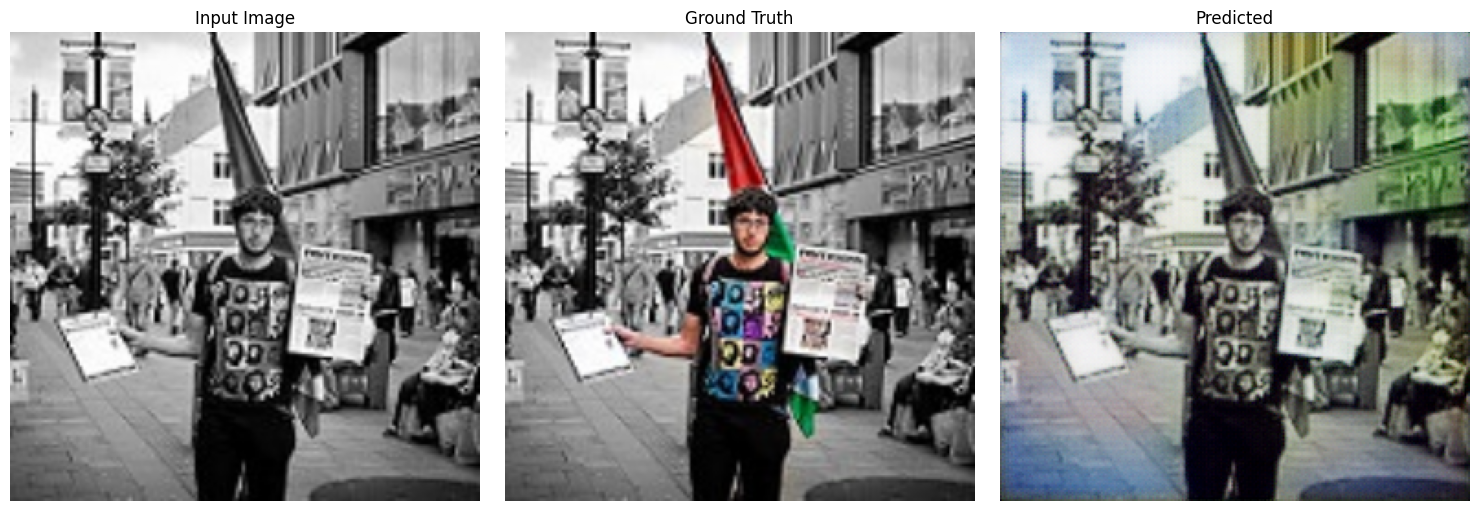

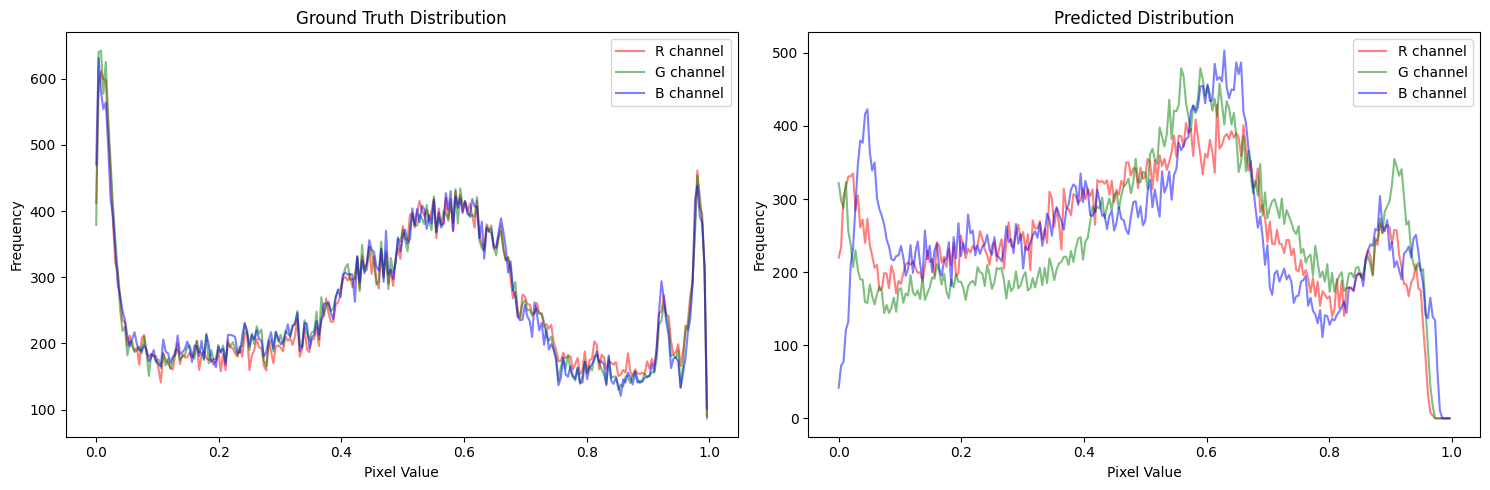

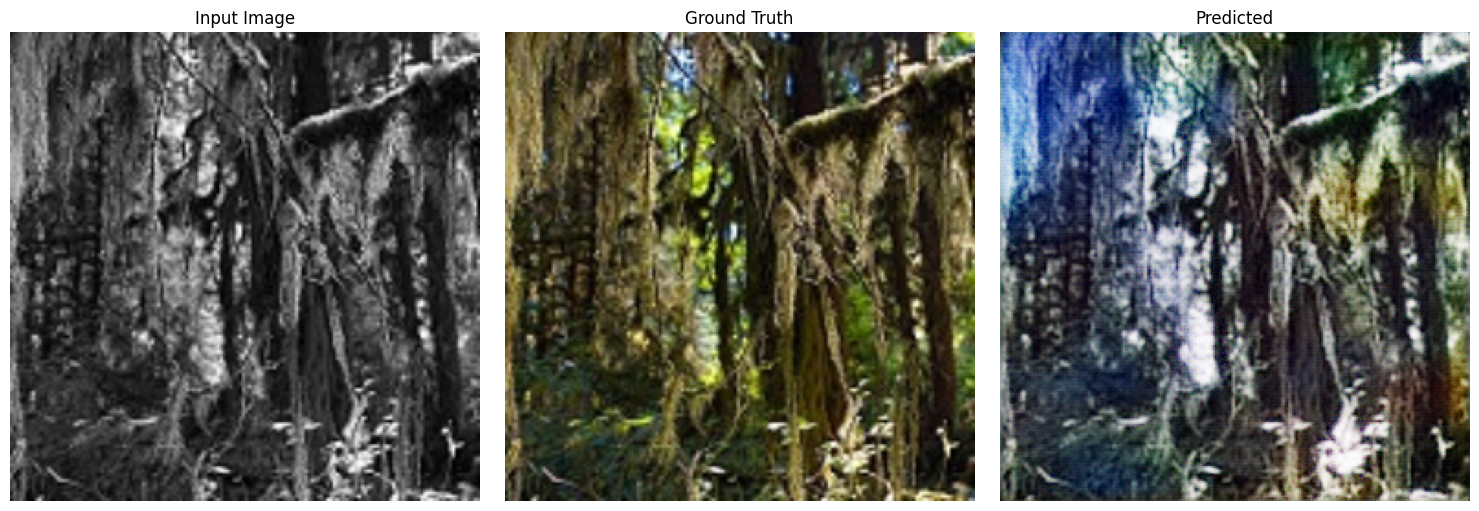

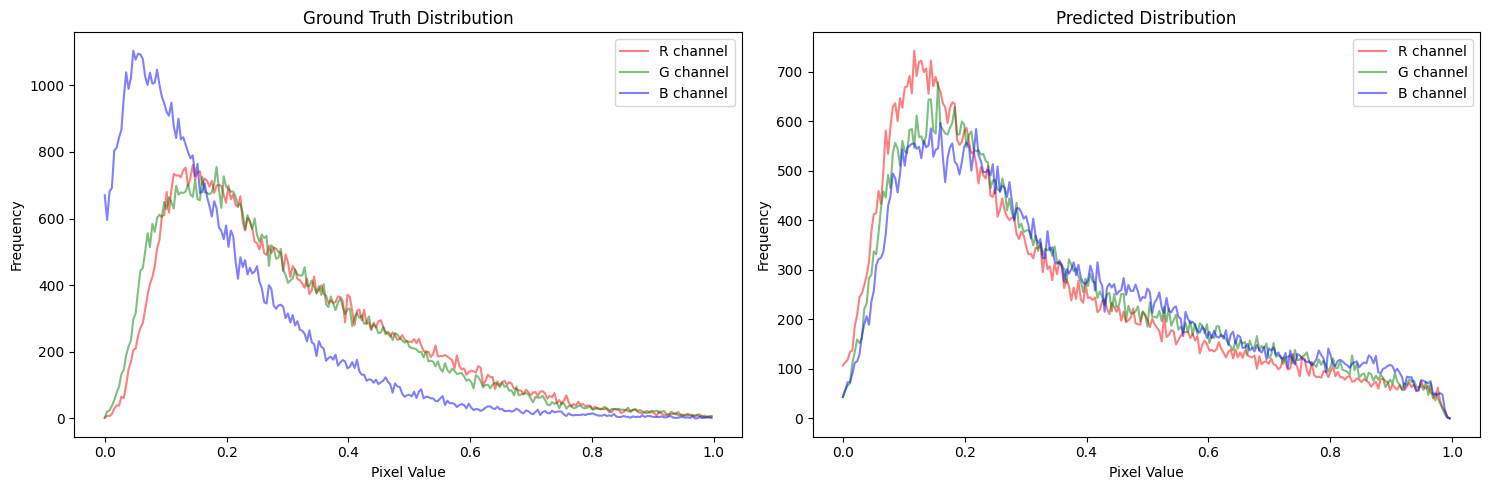

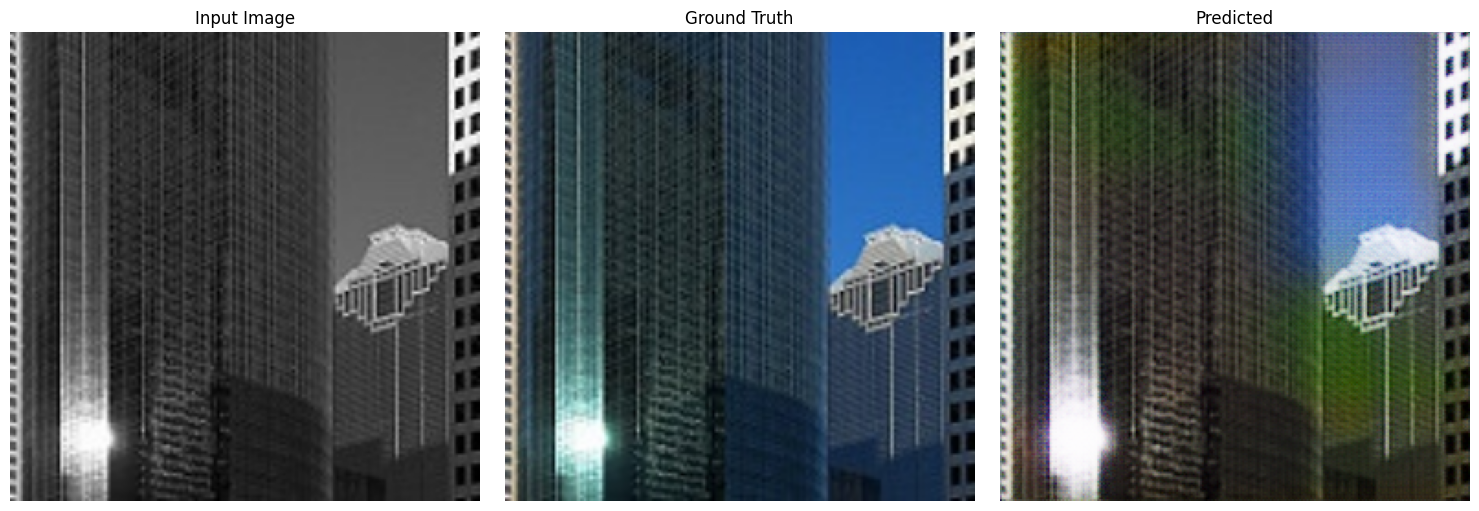

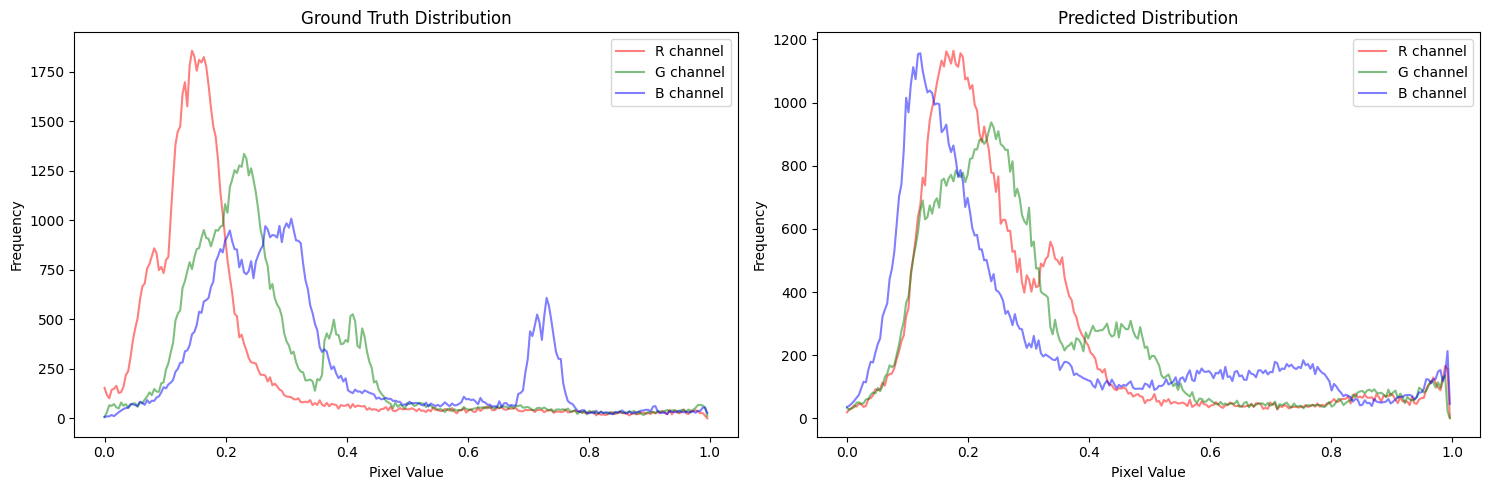

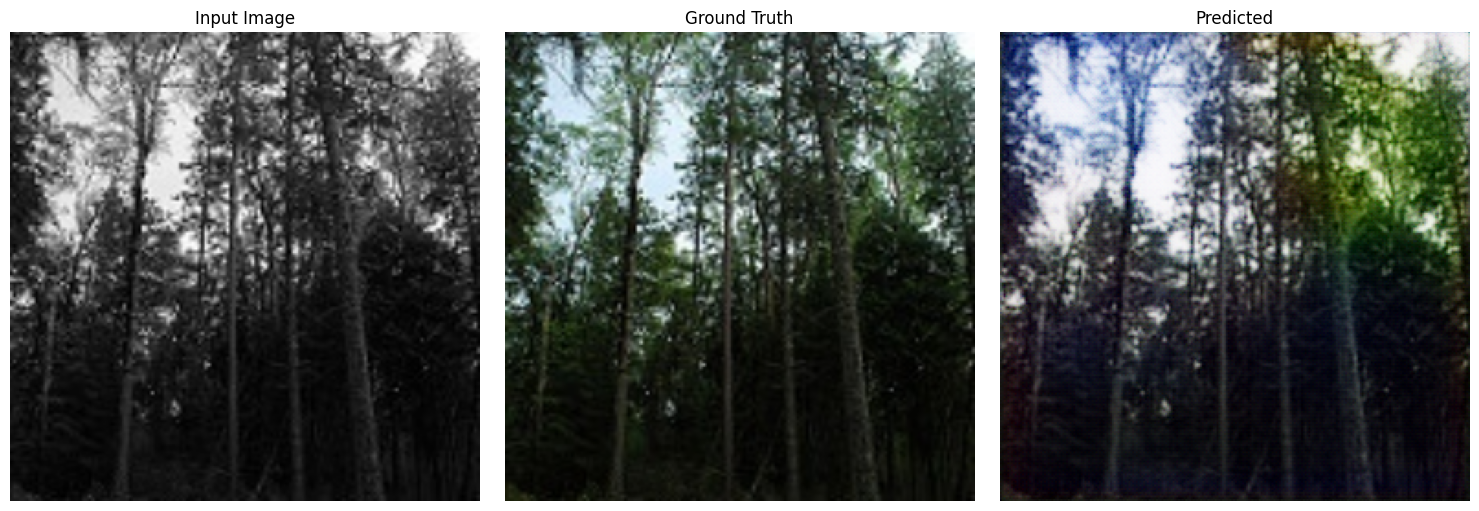

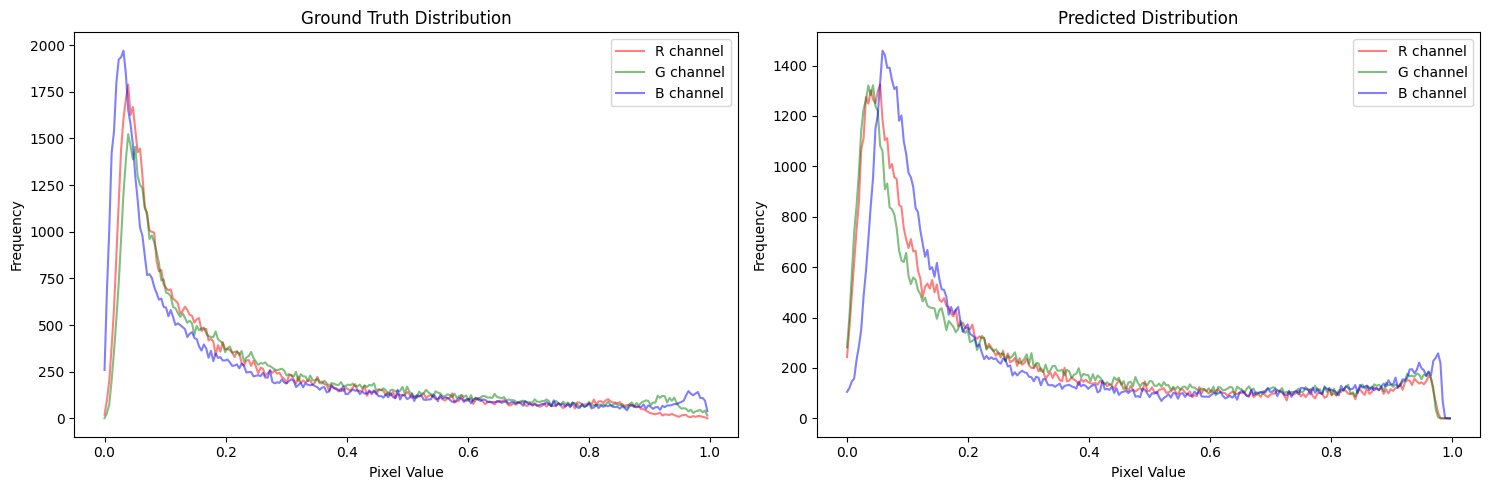

In [38]:
num_images_to_display = 2
generate_images_and_distribution(generator, gray_dataset_t, color_dataset_t, num_images_to_display)

In [39]:
generator.save('/kaggle/working/generator_model.keras')
discriminator.save('/kaggle/working/discriminator_model.keras')

In [40]:
import zipfile
generator_model_path = '/kaggle/working/generator_model.keras'
discriminator_model_path = '/kaggle/working/discriminator_model.keras'
zip_filename = '/kaggle/working/GAN_models.zip'
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    zipf.write(generator_model_path, 'generator_model.keras')
    zipf.write(discriminator_model_path, 'discriminator_model.keras')

In [42]:
autoencoder.save('/kaggle/working/autoencoder_model.keras')